In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
# import pandas as pd
from mpl_toolkits import mplot3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arccos,linspace,array,arange,meshgrid,abs

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')
# plt.style.use('Solarize_Light2')

$\renewcommand{\vec}{\mathbf}$

## Example

Let $C$ be the piece of the parabola $y=(x-1)^2$ from $(0,1)$ to $(3,4)$, and let $f(x,y) = x+y$. 

Compare the line integrals $\int_C f\, dx$, $\int_C f\, dy$, and $\int_C f\, ds$.

#### Solution

In [2]:
# r = lambda t: np.array([t,(t-1)**2])
# f = lambda x,y: x + y
# t = np.linspace(0,3,100)

@interact(angle=(-108,66,6),s=(0.,3,.1))
def _(angle=-24,vangle=(0,90,6),s=0,surf=False,
      r=fixed(lambda t: np.array([t,(t-1)**2])),
      f = fixed(lambda x,y: x + y),
      t = fixed(np.linspace(0,3,100))):
    fig = plt.figure()
    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(0,3,100) 
    v = np.linspace(0,4,100) 
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    if surf:
        ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot_surface(*r(w),z*f(*r(w)),color='r',alpha=1)

    ax.plot_surface(r(w)[0,:],0*w ,z*f(*r(w)),color='b',alpha=.5)
    ax.plot_surface(0*w ,r(w)[1,:],z*f(*r(w)),color='g',alpha=.5)
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)

    ax.set_xlim([0,4])
    ax.set_ylim([0,4])
    ax.set_zlim([0,8])
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    flush_figures()

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

In [3]:
Is = quad(lambda t: (t + (t-1)**2)*sqrt(1+4*(t-1)**2),0,3)
Ix = quad(lambda t: (t + (t-1)**2),0,3)
Iy = quad(lambda t: (t + (t-1)**2)*2*(t-1),0,3)

HTML(f"$\int_C f ds = {Is[0]}$ <br><br> " + f"$\int_C f dx = {Ix[0]}$ <br><br> " + f"$\int_C f dy = {Iy[0]}$ <br><br> ")

#### 
<p style="padding-bottom:40%;"> </p>

#### Hooke's Law

Let $x$ measure the displacement of a spring from equilibrium. **Hooke's Law** says the force is $F = -kx$.

A spring with constant $k$ compresses from 7 cm to 4 cm (past equilibrium). How much work was done by the spring?

#### Solution

$$\frac12 k 7^2 - \frac12 k 4^2 = \frac{33}{2}k$$

#### 
<p style="padding-bottom:40%;"> </p>

#### Rolling down a ramp. 

A ball falls down a parabolic ramp $y=x^2$ from $(-2,4)$ to the origin. How much work was done by gravity?

#### Solution

$\vec r(t) = \langle t - 2, (t-2)^2 \rangle $ for $0 \leq t \leq 2$ (there are other ways to do this).

$\vec F(x,y) = \langle 0,-mg\rangle$ is constant force of gravity where we assume the appropriate units.

$$ W = \int_C \vec F\cdot d\vec r = \int_0^2 \langle 0,-mg\rangle \cdot \langle 1,  2(t-2) \rangle  = mg4$$

#### 
<p style="padding-bottom:40%;"> </p>

### Exercise

![Line integral of vector field example from Stewart](../img/stew-lineintex.png)

#### Solution

$$\int_{C_1}\vec F\cdot \vec r > 0$$

$$\int_{C_2}\vec F\cdot \vec r < 0$$

#### 
<p style="padding-bottom:40%;"> </p>

## Example

Compute $\int_C \vec F \cdot d\vec r$ for the two paths below from $(2,0)$ to $(-\sqrt{2},\sqrt{2})$ in the field $\langle -y,x \rangle$. Try to predict which is greater before you start.

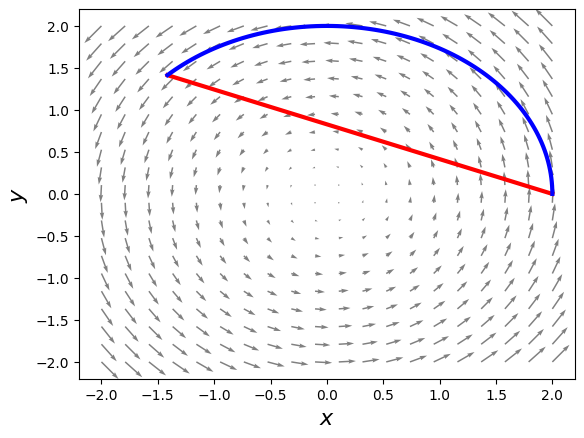

In [4]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure()
plt.quiver(x,y,-y,x,color='gray');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
# plt.arrow(0,2*sqrt(2)/(2+sqrt(2)),1/2,1/2)
plt.plot(2*cos(t*3*pi/4),2*sin(t*3*pi/4),'b',lw=3);

#### Solutiion

Blue path. $\vec r(t) = \langle 2\cos t,2\sin t\rangle$ for $0 \leq t \leq \frac{3\pi}{4}$.

$$\int_0^{3\pi/4} \langle -2\sin t,2\cos t\rangle \cdot \langle -2\sin t, 2 \cos t \rangle dt = 3\pi$$

In [5]:
# Blue path
quad(lambda t: np.dot((-2*sin(t),2*cos(t)),(-2*sin(t),2*cos(t))),0,3*pi/4)[0]

9.424777960769378

Red path. $\vec r(t) = (1-t)\langle 2,0\rangle + t\langle -\sqrt{2},\sqrt{2}$ for $0 \leq t \leq 1$.

$$\int_0^{1} \langle -t\sqrt{2},2-(2+\sqrt{2})t\rangle \cdot \langle -(2+\sqrt{2}), \sqrt2 \rangle dt = 2\sqrt2$$

In [6]:
3*pi

9.42477796076938

In [7]:
# Red path
quad(lambda t: np.dot((-sqrt(2)*t,2-(2+sqrt(2))*t),(-(2+sqrt(2)),sqrt(2))),0,1)[0]

2.8284271247461907

In [8]:
2*sqrt(2)

2.8284271247461903

####
<p style="padding-bottom:40%;"> </p>

## Example

Which of the following fields is conservative?

  1. $x\,\vec i$
  1. $x\,\vec j$
  1. Both.
  1. Neither.

#### Solution

1. $f(x,y,z) = x^2/2$

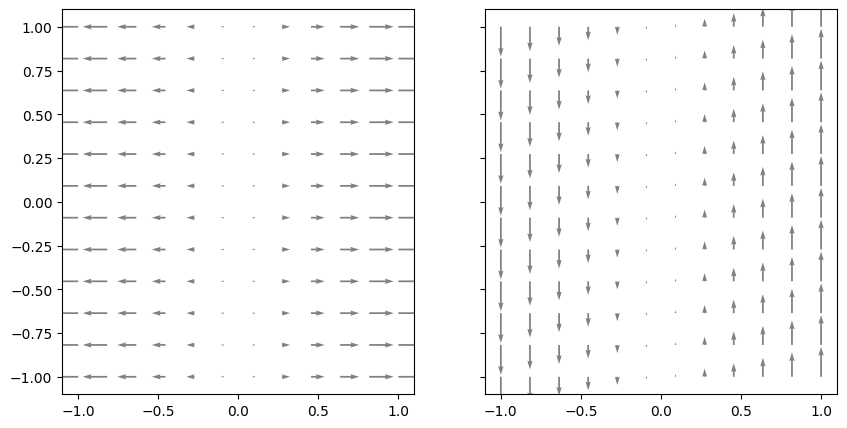

In [9]:
x = y = linspace(-1,1,12)
x,y = meshgrid(x,y)
fig, axs=plt.subplots(1,2,figsize=(10,5),sharey=True)
axs[0].quiver(x,y,x,0,color='gray')
axs[1].quiver(x,y,0,x,color='gray');

#### 
<p style="padding-bottom:40%;"> </p>